In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

import constants as c
import fgh

%matplotlib inline

In [2]:
def V_LJ(r, L, atom):
    # Cs
    if atom == 'cs+cs':
        C6 = 6891 # [a.u. = Ha * a0^6 ?]
        De = 0.001271 # 279 [cm^-1]
        m = 132.905451931 / 5.485e-4 / 2.0
    elif atom == 'cs2+cs':
        C6 = 6891 * 2
        De = 0.001271 * 2
        m = 2.0/3.0 * 132.905451931 / 5.485e-4
    # K
    elif atom == 'k+k':
        C6 = 3927
        De = 253 * 4.5563353e-6
        m = 39.0983 / 5.485e-4 / 2.0
    elif atom == 'k2+k':
        C6 = 3927 * 2
        De = 253 * 4.5563353e-6 * 2
        m = 2.0/3.0 * 39.0983 / 5.485e-4    
    elif atom == 'li+li':
        C6 = 1394
        De = 334 * 4.5563353e-6
        m = 6.015121 / 5.485e-4  / 2.0        
    elif atom == 'li2+li':
        C6 = 1394 * 2
        De = 334 * 4.5563353e-6 * 2
        m = 2.0/3.0 * 6.015121 / 5.485e-4          
    C12 = C6**2/(4*De)
    return C12/r**12 - C6/r**6 + L*(L+1)/(2*m*r**2)

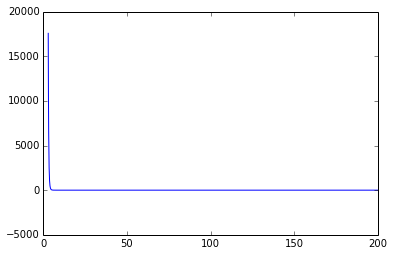

In [3]:
r = np.linspace(3,200,1500)
plt.plot(r,V_LJ(r,0,'cs+cs'))

In [4]:
def find_bound_states(E):
    E_bound = filter(lambda x: x<0, E)
    return E_bound

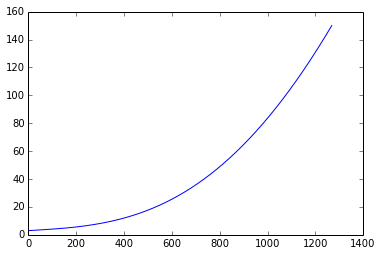

In [5]:
A, beta = 2000, 1.0/(2000+20)
cmap = lambda Q: Q - A * np.arctan(beta*Q)
dcmap = lambda Q: 1 - A * beta / (1 + (beta * Q)**2)
grid = fgh.grid(3,150,1500,cmap,dcmap)
plt.plot(grid.Q,grid.q)

In [8]:
atoms = ('li','k','cs')
n_maxs = (100,100,220)
L_maxs = (200,180,350)

In [9]:
for i in range(1,3):
    
    atom = atoms[i]
    n_max = n_maxs[i]
    L_max = L_maxs[i]

    if atom == 'cs':
        m = 132.905451931 / 5.485e-4 # [a.u.]
    elif atom == 'k':
        m = 39.0983 / 5.485e-4 # [a.u.]   
    elif atom == 'li':
        m = 6.015121 / 5.485e-4 # [a.u.]
    m_dimer = m / 2.0 # reduced mass
    m_collision = 2.0/3.0 * m
    dimer = atom+'+'+atom
    collision = atom+'2+'+atom

    for n in range(0,n_max):
        prob = fgh.problem(lambda r: V_LJ(r,n,dimer),m_dimer,units='a.u.')
        sol = fgh.solve(prob,grid)
        E_bound = find_bound_states(sol.E)
        fname = 'dos/{0}/{0}+{0}_n{1}.txt'.format(atom,n)
        np.savetxt(fname,E_bound)

    for L in range(0,L_max):
        prob = fgh.problem(lambda r: V_LJ(r,L,collision),m_collision,units='a.u.')
        sol = fgh.solve(prob,grid)
        E_bound = find_bound_states(sol.E)
        fname = 'dos/{0}/{0}2+{0}_L{1}.txt'.format(atom,L)
        np.savetxt(fname,E_bound) 


KeyboardInterrupt: 